# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

### MNIST with Keras

The goal of exercise 12 is to use deep neural network models, implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9).

The MNIST dataset comprises $70000$ handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ gradation of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic **classification task**. 

In [1]:
import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist  #carico le foto dal dataset di keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

2022-06-09 17:01:40.697318: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 17:01:40.697346: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Step 1: Load and Process the Data

Keras can conveniently download the MNIST data from the web. All we need to do is import the `mnist` module and use the `load_data()` class, and it will create the training and test data sets or us.

The MNIST set has pre-defined test and training sets, in order to facilitate the comparison of the performance of different models on the data.

Once we have loaded the data, we need to format it in the correct shape.

In [2]:
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


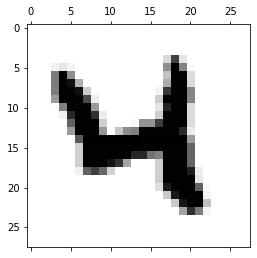

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [7]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    print('Model architecture created successfully!')
    return model



def compile_model_SGD():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    model.save_weights('model_weights_SGD.h5')
    print('Model compiled successfully and ready to be trained.')
    return model

def compile_model_RMSprop():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=RMSprop(),
                  metrics=['acc'])
    model.save_weights('model_weights_RMSprop.h5')
    print('Model compiled successfully and ready to be trained.')
    return model

def compile_model_Adam():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['acc'])
    # save the weights that we will use later
    model.save_weights('model_weights_Adam.h5')
    print('Model compiled successfully and ready to be trained.')
    return model


Dropout, during training, slices off some artificial neurons, thus, training accuracy suffers.

Dropout, during testing, turns itself off and allows all of the ‘weak classifiers’ in the neural network to be used. Thus, testing accuracy improves with respect to training accuracy.

In [8]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

NameError: name 'model_DNN' is not defined

### Exercise 12.1

<span style="color:red">Change at will and train your DNN by increasing the number of epochs to an adeuqate value</span>. Try to use at least two other optimizers, different from SGD: <span style="color:red">watch to accuracy and loss for training and validation data and comment on the performances</span>.

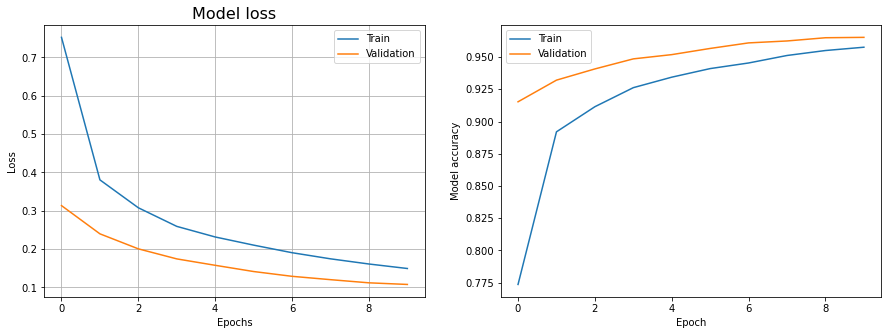

313/313 [==============================] - 1s 2ms/step - loss: 0.0976 - acc: 0.9800

Test loss: 0.09764818847179413
Test accuracy: 0.9800000190734863


In [13]:
# training parameters
batch_size = 32
epochs = 10

# create the deep neural net
model_DNN = compile_model_SGD()

# train DNN and store training info in history
historySGD = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

# look into training history
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historySGD.history['loss'])
plt.plot(historySGD.history['val_loss'])
plt.title('Model loss', fontsize=16)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='best')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(historySGD.history['acc'])
plt.plot(historySGD.history['val_acc'])
plt.ylabel('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model architecture created successfully!
Model compiled successfully and ready to be trained.
Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2738 - acc: 0.9215 - val_loss: 0.1165 - val_acc: 0.9679
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1513 - acc: 0.9621 - val_loss: 0.1285 - val_acc: 0.9666
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1416 - acc: 0.9688 - val_loss: 0.1349 - val_acc: 0.9726
Epoch 4/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1406 - acc: 0.9718 - val_loss: 0.1232 - val_acc: 0.9762
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1420 - acc: 0.9711 - val_loss: 0.1732 - val_acc: 0.9755
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1494 - acc: 0.9719 - val_loss: 0.1850 - val_acc: 0.9726
Epoch 7/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1527 - acc: 0.9727 - val

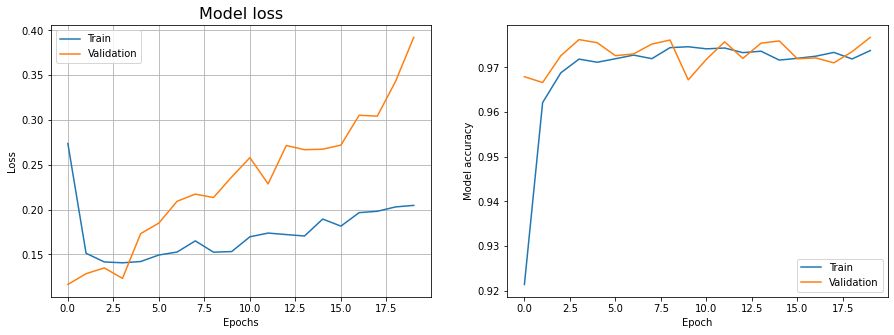

313/313 [==============================] - 1s 2ms/step - loss: 0.3923 - acc: 0.9767

Test loss: 0.39234450459480286
Test accuracy: 0.9767000079154968


In [17]:
# training parameters
batch_size = 32
epochs = 20
# create the deep neural net
model_DNN = compile_model_RMSprop()

# train DNN and store training info in history
historyRMSprop = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# look into training history
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historyRMSprop.history['loss'])
plt.plot(historyRMSprop.history['val_loss'])
plt.title('Model loss', fontsize=16)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='best')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(historyRMSprop.history['acc'])
plt.plot(historyRMSprop.history['val_acc'])
plt.ylabel('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model architecture created successfully!
Model compiled successfully and ready to be trained.
Epoch 1/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2841 - acc: 0.9175 - val_loss: 0.1151 - val_acc: 0.9653
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1243 - acc: 0.9642 - val_loss: 0.0871 - val_acc: 0.9731
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0869 - acc: 0.9746 - val_loss: 0.0794 - val_acc: 0.9757
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0696 - acc: 0.9798 - val_loss: 0.0833 - val_acc: 0.9777
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0560 - acc: 0.9833 - val_loss: 0.0728 - val_acc: 0.9800
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0473 - acc: 0.9850 - val_loss: 0.0737 - val_acc: 0.9814
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0407 - acc: 0.987

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0114 - acc: 0.9973 - val_loss: 0.2631 - val_acc: 0.9812
Epoch 61/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0118 - acc: 0.9978 - val_loss: 0.2274 - val_acc: 0.9822
Epoch 62/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0095 - acc: 0.9978 - val_loss: 0.2464 - val_acc: 0.9812
Epoch 63/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0103 - acc: 0.9974 - val_loss: 0.2422 - val_acc: 0.9808
Epoch 64/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0093 - acc: 0.9978 - val_loss: 0.2274 - val_acc: 0.9824
Epoch 65/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0097 - acc: 0.9977 - val_loss: 0.2379 - val_acc: 0.9838
Epoch 66/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0103 - acc: 0.9980 - val_loss: 0.2368 - val_acc: 0.9814
Epoch 67/100
1875/1875 [==============================] - 7s 

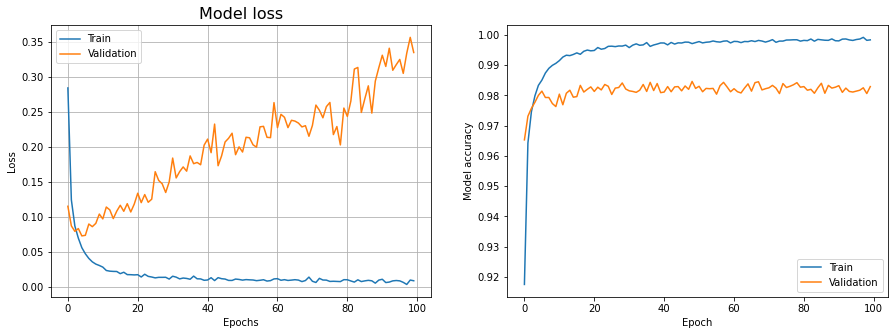

313/313 [==============================] - 1s 2ms/step - loss: 0.3347 - acc: 0.9829

Test loss: 0.3346670866012573
Test accuracy: 0.9829000234603882


In [19]:
# training parameters
batch_size = 32
epochs = 100
# create the deep neural net
model_DNN = compile_model_Adam()

# train DNN and store training info in history
historyAdam = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# look into training history
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(historyAdam.history['loss'])
plt.plot(historyAdam.history['val_loss'])
plt.title('Model loss', fontsize=16)
plt.grid()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='best')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(historyAdam.history['acc'])
plt.plot(historyAdam.history['val_acc'])
plt.ylabel('Model accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#### Creating Convolutional Neural Nets with Keras

We have so far considered each MNIST data sample as a $(28\times 28,)$-long 1d vector. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, but also *translational invariance*, which we would like to take advantage of to improve the accuracy of our classification model. To this end, we first need to reshape the training and test input data as follows

In [ ]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
#serve a portarlo nel formato della figura
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

One can ask the question of whether a neural net can learn to recognize such local patterns. This can be achieved by using convolutional layers.

### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

In [ ]:
#THIS IS INCOMPLETE ... COMPLETE BEFORE EXECUTING IT

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

Train your DCNN and evaluate its performance proceeding exactly as before:

In [ ]:
# training parameters
batch_size = 32
epochs = # INSERT HERE AN ADEQUATE NUMBER OF EPOCHS!

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In the end, **<span style="color:red">add the evaluation of your CNN performances</span>** like that used for the DNN.

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

For example, you can use the following code to import a picture of an handwritten digit
(Note: you should install Python Image Library (PIL/Pillow):

In [ ]:
# TO LOAD FILES ON GOOGLE COLAB
#from google.colab import files
#upload = files.upload() #this will let you browse and choose the file to be uploaded

In [ ]:
from PIL import Image
import os

digit_filename = "./Pictures/8b.png"
digit_in = Image.open(digit_filename).convert('L')
#digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

I use the previously trained DNN to predict the digit:

In [ ]:
print(data.shape)
data = data.reshape(1,xdim*ydim)
print(data.shape)
pred_0 = model_DNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()

### <span style="color:green">Supplementary information 1: Use of `gimp` </span>

- from the Unix shell type: `gimp` and hit `Return`
- File -> new (chose: 28x28 pixels)
- rascale the image to 800%
- Use the **brush** with dimension 2px to draw your digit
- Color -> invert (to have black background)
- Export the image as a `.png` file

That's all!

### <span style="color:green">Supplementary information 2: Display trained filters in your CNN</span>

Print your NN layers:

In [ ]:
layer_index=0
for layer in model_CNN.layers:
    print(layer_index, layer.name)
    layer_index+=1

Display your filters:

In [ ]:
# layer_index should be the index of a convolutional layer
layer_index=0
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot filters
n_filters, ix = filters.shape[3], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()

### <span style="color:green">Supplementary information 3: Monitor layer outputs in your CNN</span>

In [ ]:
test_index = 0

from keras.models import Model
layer_outputs = [layer.output for layer in model_CNN.layers]
activation_model = Model(inputs=model_CNN.input, outputs=layer_outputs)
activations = activation_model.predict(X_test[test_index].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, layer_index): 
    activation = activations[layer_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3,col_size*3))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [ ]:
%matplotlib inline
plt.imshow(X_test[test_index][:,:,0], cmap='gray')
# def display_activation(activations, col_size, row_size, layer number)
display_activation(activations, 4, 2, 0)
# col_size x row_size must be <= Number of filters for the convolutional layer